## Kaggle: Titanic
https://www.kaggle.com/c/titanic/data

## Data Cleasning

Reference:
https://www.kaggle.com/catherineb/titanic-tutorial-python-ii-pandas

In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing

In [2]:
%ls

dataset/       titanic.ipynb


In [3]:
# Dataset stored under directory dataset/
%ls dataset/

gender_submission.csv  test.csv               train.csv


In [4]:
df = pd.read_csv('dataset/train.csv', header=0)

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# PassengerId, Ticket, Cabin columns can be omitted
df = df.drop(['Name', 'PassengerId', 'Ticket', 'Cabin'], axis=1)

In [7]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


### Data Cleansing part

In [8]:
df.info()
print('\nShape:', df.shape)

# Found missing data in 'Age' amd 'Embarked'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB

Shape: (891, 8)


### 'Embarked' (found missing data)

In [9]:
# Checking what's the values and its counts for 'Embarked'
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [10]:
df[df['Embarked'].isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
61,1,1,female,38.0,0,0,80.0,NaN
829,1,1,female,62.0,0,0,80.0,NaN


In [11]:
# Assumming
# Fill 'Embarked' null to 'S' which is the most frequent value for the column
df['Embarked'] = df['Embarked'].fillna('S')

In [12]:
# Change string value to numbers for data analysis purpose
df['Embarked'] = df['Embarked'].map({'S':0, 'C':1, 'Q':2}).astype(int)

In [13]:
# check
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,0
1,1,1,female,38.0,1,0,71.2833,1
2,1,3,female,26.0,0,0,7.9250,0
3,1,1,female,35.0,1,0,53.1000,0
4,0,3,male,35.0,0,0,8.0500,0


### 'Sex'

In [14]:
# difficult to run analysis of strings of "male" and "female", transform it to 0/1
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [15]:
df['Sex'] = df['Sex'].map({'female': 0, 'male': 1}).astype(int)

In [16]:
# check
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,0
1,1,1,0,38.0,1,0,71.2833,1
2,1,3,0,26.0,0,0,7.9250,0
3,1,1,0,35.0,1,0,53.1000,0
4,0,3,1,35.0,0,0,8.0500,0


### 'Age' (found missing data)

In [17]:
# use mean value to fill missing data (temporarily implement)
df['Age'] = df['Age'].fillna(df.Age.mean())

### 'SibSp' and 'Parch' combined to 'FamilySize'

In [18]:
# Parch = number of parents or children on board
# SibSp = number of siblings or spouses
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1 # himself is one

In [19]:
# Now we don't need 'SibSp' and 'Parch' columns
df = df.drop(['SibSp','Parch'], axis=1)

In [20]:
# check
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,0,3,1,22.0,7.2500,0,2
1,1,1,0,38.0,71.2833,1,2
2,1,3,0,26.0,7.9250,0,1
3,1,1,0,35.0,53.1000,0,2
4,0,3,1,35.0,8.0500,0,1


### Normalization
https://chrisalbon.com/python/data_wrangling/pandas_normalize_column/

In [21]:
for column in ['Pclass', 'Age', 'Fare','Embarked', 'FamilySize']:
    # Create x, where x the 'scores' column's values as floats
    x = df[[column]].values.astype(float)

    # Create a minimum and maximum processor object
    min_max_scaler = preprocessing.MinMaxScaler()

    # Create an object to transform the data to fit minmax processor
    x_scaled = min_max_scaler.fit_transform(x)

    # Run the normalizer on the dataframe
    df[[column]] = x_scaled
df

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,0,1.0,1,0.271174,0.014151,0.0,0.1
1,1,0.0,0,0.472229,0.139136,0.5,0.1
2,1,1.0,0,0.321438,0.015469,0.0,0.0
3,1,0.0,0,0.434531,0.103644,0.0,0.1
4,0,1.0,1,0.434531,0.015713,0.0,0.0
5,0,1.0,1,0.367921,0.016510,1.0,0.0
6,0,0.0,1,0.673285,0.101229,0.0,0.0
7,0,1.0,1,0.019854,0.041136,0.0,0.4
8,1,1.0,0,0.334004,0.021731,0.0,0.2
9,1,0.5,0,0.170646,0.058694,0.5,0.1


### After data cleansing

In [22]:
X_train = np.array(df.drop('Survived', axis=1), dtype='float32')
y_train = np.array(df['Survived'], dtype='float32')

In [23]:
print('X Shape:',X_train.shape)
X_train[0]

X Shape: (891, 6)


array([1.        , 1.        , 0.27117366, 0.01415106, 0.        ,
       0.1       ], dtype=float32)

In [24]:
y_train[0]

0.0

### Summary

In [119]:
#Include all codes in one function
def data_cleansing(data_type):
    path = 'dataset/{}.csv'.format(data_type)
    df = pd.read_csv(path, header=0)
    df = df.drop(['Name', 'PassengerId', 'Ticket', 'Cabin'], axis=1)
    
    df['Embarked'] = df['Embarked'].fillna('S')
    df['Embarked'] = df['Embarked'].map({'S':0, 'C':1, 'Q':2}).astype(int)
    
    df['Sex'] = df['Sex'].map({'female': 0, 'male': 1}).astype(int)
    
    df['Age'] = df['Age'].fillna(df.Age.mean())
    
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1 # himself is one
    df = df.drop(['SibSp','Parch'], axis=1)

    return df

In [120]:
X_test = data_cleansing('test')

In [123]:
X_test['Fare'] = X_test['Fare'].fillna(X_test['Fare'].mean())

X_test.head()

,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,3,1,34.5,7.8292,2,1
1,3,0,47.0,7.0000,0,2
2,2,1,62.0,9.6875,2,1
3,3,1,27.0,8.6625,0,1
4,3,0,22.0,12.2875,0,3


In [124]:
for column in ['Pclass', 'Age', 'Fare','Embarked', 'FamilySize']:
    # Create x, where x the 'scores' column's values as floats
    x = X_test[[column]].values.astype(float)

    # Create a minimum and maximum processor object
    min_max_scaler = preprocessing.MinMaxScaler()

    # Create an object to transform the data to fit minmax processor
    x_scaled = min_max_scaler.fit_transform(x)

    # Run the normalizer on the dataframe
    X_test[[column]] = x_scaled
X_test

,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,1.0,1,0.452723,0.015282,1.0,0.0
1,1.0,0,0.617566,0.013663,0.0,0.1
2,0.5,1,0.815377,0.018909,1.0,0.0
3,1.0,1,0.353818,0.016908,0.0,0.0
4,1.0,0,0.287881,0.023984,0.0,0.2
5,1.0,1,0.182382,0.018006,0.0,0.0
6,1.0,0,0.393380,0.014891,1.0,0.0
7,0.5,1,0.340630,0.056604,0.0,0.2
8,1.0,0,0.235131,0.014110,0.5,0.0
9,1.0,1,0.274693,0.047138,0.0,0.2


In [107]:
X_test = np.array(X_test, dtype='float32')
X_test.shape

(418, 6)

## Training

In [28]:
# data shape
print('Nump')
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)

Nump
X_train: (891, 6)
y_train: (891,)
X_test: (418, 6)


In [29]:
type(y_train)

numpy.ndarray

In [30]:
import numpy as np
import time
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch import optim
from torch.utils import data
import torch.nn.functional as F
from torch.autograd import Variable
from torch.nn.init import xavier_normal
from torch.nn.parameter import Parameter

In [31]:
# Hyper Parameters 
input_size = 6
hidden_size = 2
num_classes = 2
num_epochs = 100
batch_size = 30
learning_rate = 0.001

In [32]:
#===================== Input pipline for custom dataset =====================#
# You should build custom dataset as below.
class Dataset(data.Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y
        self.data_num = X.shape[0]
        
    def __getitem__(self, index):
        
        feature = torch.from_numpy(self.X[index])
        label = torch.from_numpy(np.array(self.y[index]))
        return feature, label

    def __len__(self):
        # You should change 0 to the total size of your dataset.
        return self.data_num

# Then, you can just use prebuilt torch's data loader. 
train_dataset = Dataset(X_train, y_train)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size, 
                                           shuffle=True,
                                           num_workers=2)


In [33]:
train_dataset[2]

(tensor([ 1.0000,  0.0000,  0.3214,  0.0155,  0.0000,  0.0000]), tensor(1.))

In [34]:
import collections
isinstance(train_loader, collections.Iterable)

True

In [35]:
len(train_loader)

30

In [36]:
test = iter(train_loader)
test.next()

[tensor([[ 0.0000,  0.0000,  0.4345,  1.0000,  0.5000,  0.0000],
         [ 0.0000,  0.0000,  0.3679,  0.2860,  0.5000,  0.1000],
         [ 1.0000,  1.0000,  0.2586,  0.0155,  0.0000,  0.0000],
         [ 1.0000,  1.0000,  0.8115,  0.0151,  1.0000,  0.0000],
         [ 1.0000,  1.0000,  0.0324,  0.0310,  0.0000,  0.2000],
         [ 1.0000,  1.0000,  0.3968,  0.0163,  0.0000,  0.0000],
         [ 1.0000,  0.0000,  0.1706,  0.0153,  0.0000,  0.0000],
         [ 0.5000,  1.0000,  0.3679,  0.0294,  0.5000,  0.0000],
         [ 0.5000,  0.0000,  0.6733,  0.0449,  0.0000,  0.4000],
         [ 1.0000,  1.0000,  0.3591,  0.0138,  0.0000,  0.1000],
         [ 1.0000,  0.0000,  0.3679,  0.0497,  0.0000,  0.4000],
         [ 1.0000,  1.0000,  0.2460,  0.0141,  0.5000,  0.0000],
         [ 0.5000,  1.0000,  0.2963,  0.0254,  0.0000,  0.0000],
         [ 1.0000,  1.0000,  0.2335,  0.0154,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.3679,  0.1015,  0.0000,  0.1000],
         [ 0.0000,  0.000

In [37]:
# Neural Network Model (1 hidden layer)
class Net(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out
    
net = Net(input_size, hidden_size, num_classes)

In [38]:
# Loss and Optimizer
criterion = nn.CrossEntropyLoss()  
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)

Epoch [1/100], Step [30/29], Loss: 0.6535


/Users/ellenhe/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:19: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


Iteration: 30, Loss: 0.7906771302223206, Accuracy: 61


/Users/ellenhe/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:55: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


Epoch [2/100], Step [30/29], Loss: 0.6418
Iteration: 60, Loss: 0.5475910305976868, Accuracy: 61
Epoch [3/100], Step [30/29], Loss: 0.6313
Iteration: 90, Loss: 0.6025367379188538, Accuracy: 61
Epoch [4/100], Step [30/29], Loss: 0.6192
Iteration: 120, Loss: 0.5724408030509949, Accuracy: 61
Epoch [5/100], Step [30/29], Loss: 0.6071
Iteration: 150, Loss: 0.5898855924606323, Accuracy: 62
Epoch [6/100], Step [30/29], Loss: 0.5942
Iteration: 180, Loss: 0.6053130626678467, Accuracy: 66
Epoch [7/100], Step [30/29], Loss: 0.5805
Iteration: 210, Loss: 0.5121011137962341, Accuracy: 72
Epoch [8/100], Step [30/29], Loss: 0.5688
Iteration: 240, Loss: 0.6162005662918091, Accuracy: 75
Epoch [9/100], Step [30/29], Loss: 0.5563
Iteration: 270, Loss: 0.5450006127357483, Accuracy: 77
Epoch [10/100], Step [30/29], Loss: 0.5460
Iteration: 300, Loss: 0.6192914247512817, Accuracy: 76
Epoch [11/100], Step [30/29], Loss: 0.5349
Iteration: 330, Loss: 0.5653648376464844, Accuracy: 76
Epoch [12/100], Step [30/29], 

Iteration: 2550, Loss: 0.7195935845375061, Accuracy: 81
Epoch [86/100], Step [30/29], Loss: 0.4338
Iteration: 2580, Loss: 0.34547722339630127, Accuracy: 81
Epoch [87/100], Step [30/29], Loss: 0.4357
Iteration: 2610, Loss: 0.5665663480758667, Accuracy: 81
Epoch [88/100], Step [30/29], Loss: 0.4347
Iteration: 2640, Loss: 0.4613555669784546, Accuracy: 81
Epoch [89/100], Step [30/29], Loss: 0.4345
Iteration: 2670, Loss: 0.4867466986179352, Accuracy: 81
Epoch [90/100], Step [30/29], Loss: 0.4334
Iteration: 2700, Loss: 0.38803717494010925, Accuracy: 81
Epoch [91/100], Step [30/29], Loss: 0.4338
Iteration: 2730, Loss: 0.46064358949661255, Accuracy: 81
Epoch [92/100], Step [30/29], Loss: 0.4337
Iteration: 2760, Loss: 0.45711979269981384, Accuracy: 81
Epoch [93/100], Step [30/29], Loss: 0.4330
Iteration: 2790, Loss: 0.40491431951522827, Accuracy: 81
Epoch [94/100], Step [30/29], Loss: 0.4332
Iteration: 2820, Loss: 0.44266560673713684, Accuracy: 81
Epoch [95/100], Step [30/29], Loss: 0.4339
Iter

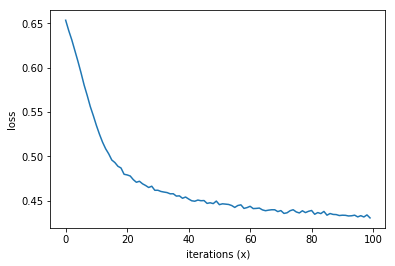

In [42]:
# Train the Model

iter = 0

avg_losses = list()
for epoch in range(num_epochs):

    sub_losses = list()

    for i, (features, labels) in enumerate(train_loader): 

        # Convert torch tensor to Variable
        features = Variable(features.view(-1, 6))
        labels = Variable(labels).long()
                # Forward + Backward + Optimize
        optimizer.zero_grad()  # zero the gradient buffer
        outputs = net(features)
        loss = criterion(outputs, labels)
        sub_losses.append(loss.data[0])
        
        loss.backward()
        optimizer.step()
        
        iter += 1

        if iter % 30 == 0:
            avg_loss = np.sum(sub_losses) / len(sub_losses)
            avg_losses.append(avg_loss)
            print ('Epoch [%d/%d], Step [%d/%d], Loss: %.4f' 
                   %(epoch+1, num_epochs, i+1, len(train_dataset)//batch_size, avg_loss))

            correct = 0
            total = 0
            # Iterate through test dataset
            for f, l in train_loader:
                # Load images to a Torch Variable
                f = Variable(f.view(-1, 6))
                
                # Forward pass only to get logits/output
                outputs = net(f)
                
                # Get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)
                
                l = l.long()
                # Total number of labels
                total += l.size(0)
                
                # Total correct predictions
                correct += (predicted == l).sum()
                
            accuracy = 100 * correct / total
        
            # Print Loss
            print('Iteration: {}, Loss: {}, Accuracy: {}'.format(iter, loss.data[0], accuracy))

print ('Train model : Epoch [%d/%d], Average Loss: %.8f' %(epoch+1, num_epochs, np.mean(avg_losses)))
x = np.arange(len(avg_losses))
plt.plot(x, avg_losses, label='train')
plt.xlabel('iterations (x)')
plt.ylabel('loss')
plt.show()

In [108]:
X_test.shape

(418, 6)

In [109]:
features = Variable(torch.from_numpy(X_test))
outputs = net(features)

In [110]:
_, predicted = torch.max(outputs.data, 1)

In [111]:
result = predicted.numpy()
result

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,

In [47]:
result_column = pd.DataFrame(result)
result_column

,0
0,0
1,0
2,0
3,1
4,1
5,1
6,1
7,1
8,1
9,1


In [132]:
#Include all codes in one function
def dataframe_cleansing(data_type):
    path = 'dataset/{}.csv'.format(data_type)
    df = pd.read_csv(path, header=0)
    df = df.drop(['Name', 'Ticket', 'Cabin'], axis=1)
    
    df['Embarked'] = df['Embarked'].fillna('S')
    df['Embarked'] = df['Embarked'].map({'S':0, 'C':1, 'Q':2}).astype(int)
    
    df['Sex'] = df['Sex'].map({'female': 0, 'male': 1}).astype(int)
    
    df['Age'] = df['Age'].fillna(df.Age.mean())
    
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1 # himself is one
    df = df.drop(['SibSp','Parch'], axis=1)

    return df

In [133]:
test_df = dataframe_cleansing('test')

In [134]:
test_df['Survived'] = result_column

In [135]:
test_df = test_df.drop(['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'FamilySize'],axis=1)

In [136]:
test_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,1
5,897,1
6,898,1
7,899,1
8,900,1
9,901,1


In [137]:
test_df[test_df['Survived'] == 0].count()

PassengerId    55
Survived       55
dtype: int64

In [138]:
test_df.to_csv('dataset/prediction.csv',index=False)